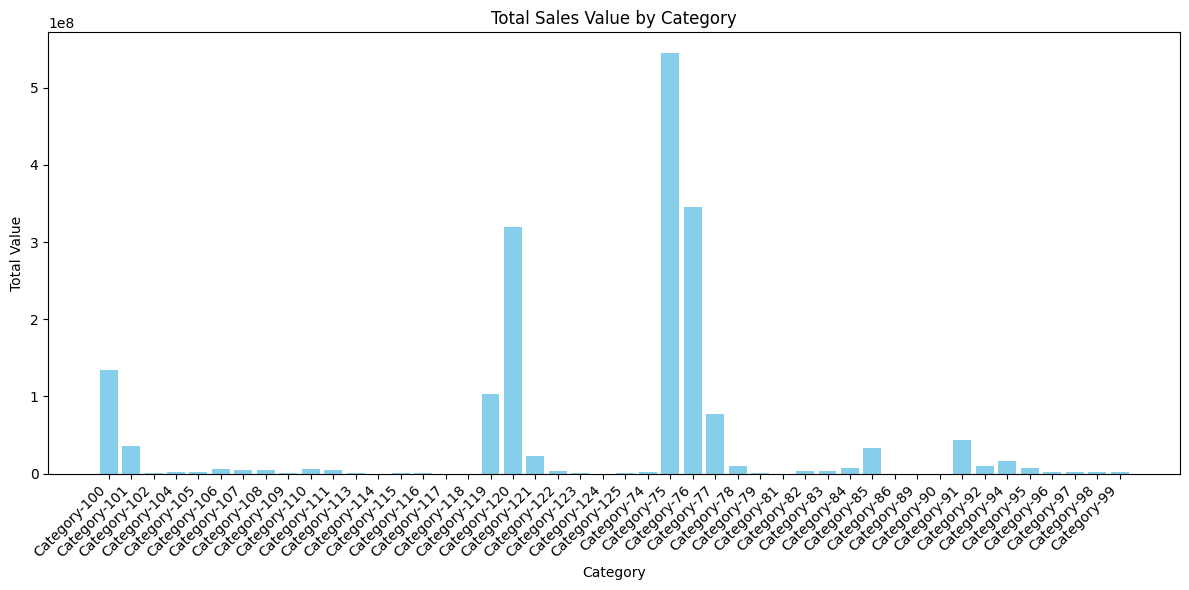

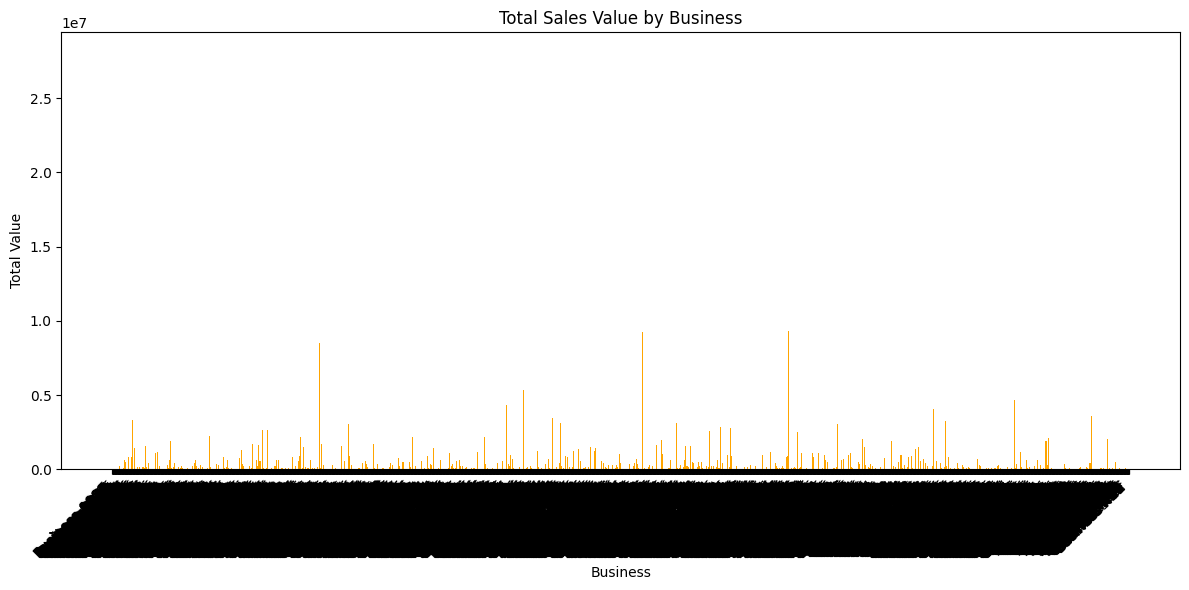

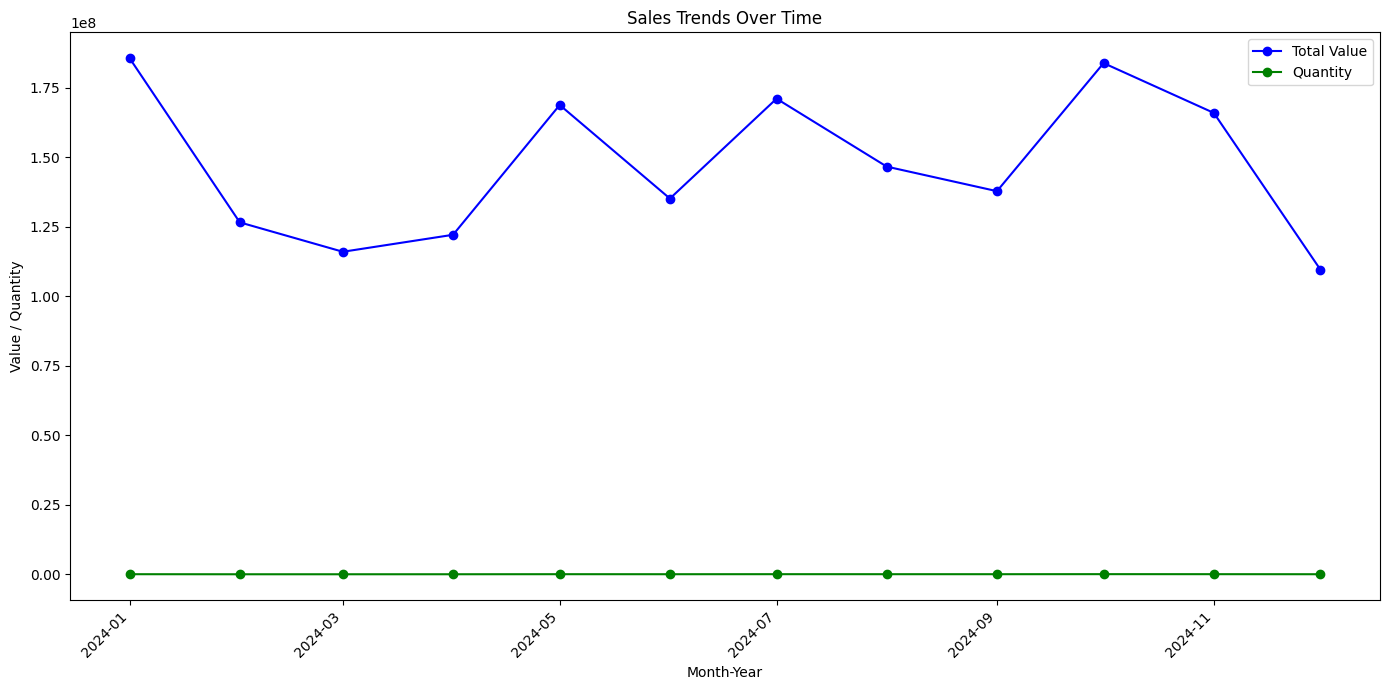

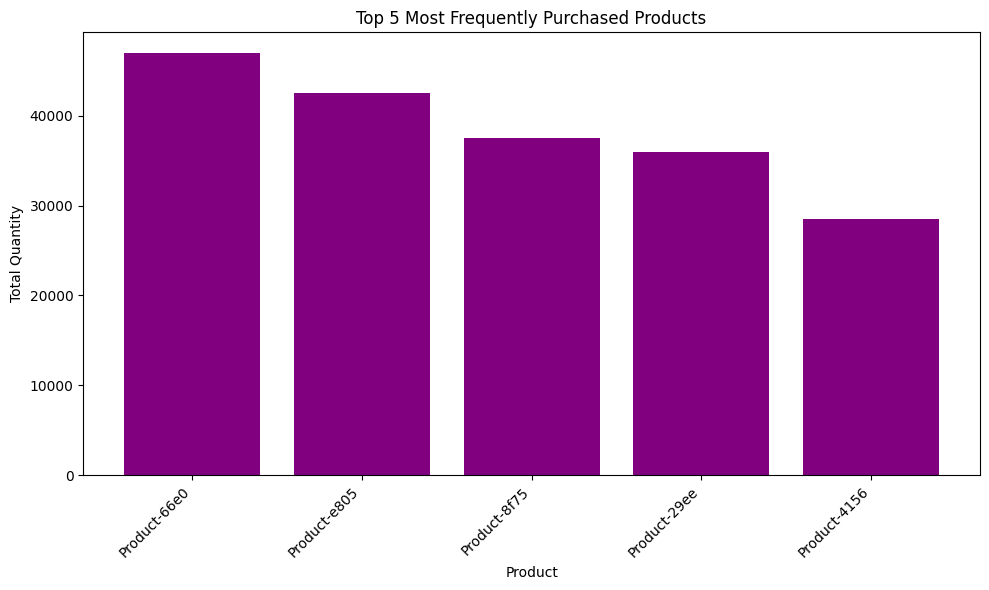

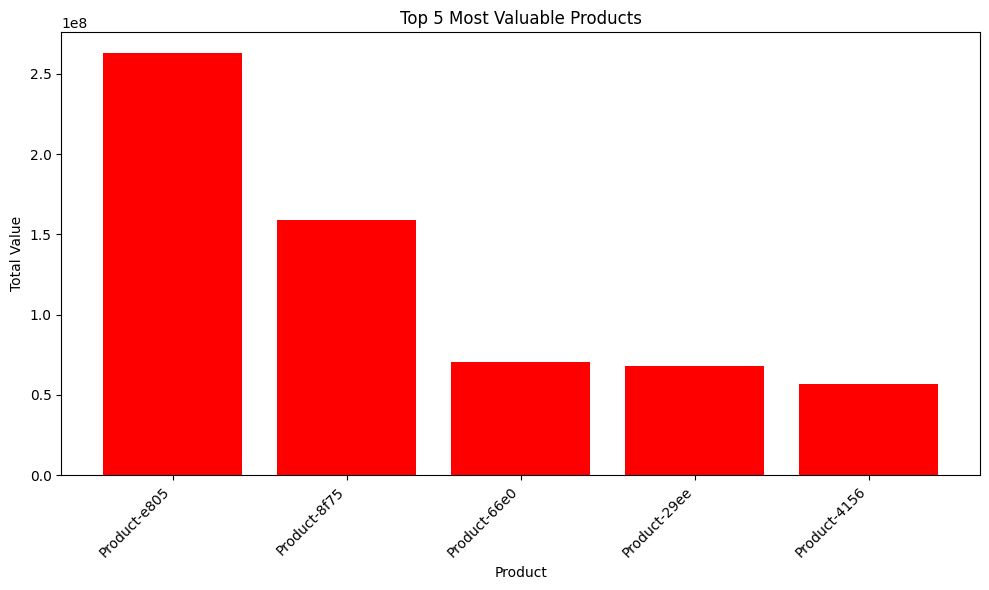

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("cleaned_data.csv")

# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Ensure Total_Value is correctly calculated
if 'Total_Value' not in df.columns:
    df['Total_Value'] = df['QUANTITY'] * df['UNIT PRICE']

# --- Sales Overview ---
def sales_overview(df):
    # Group by Anonymized Category
    category_sales = df.groupby('ANONYMIZED CATEGORY').agg({
        'QUANTITY': 'sum',
        'Total_Value': 'sum'
    }).reset_index()

    # Group by Anonymized Business
    business_sales = df.groupby('ANONYMIZED BUSINESS').agg({
        'QUANTITY': 'sum',
        'Total_Value': 'sum'
    }).reset_index()

    # Visualization for Categories
    plt.figure(figsize=(12, 6))
    plt.bar(category_sales['ANONYMIZED CATEGORY'], category_sales['Total_Value'], color='skyblue')
    plt.title("Total Sales Value by Category")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Total Value")
    plt.xlabel("Category")
    plt.tight_layout()
    plt.show()

    # Visualization for Businesses
    plt.figure(figsize=(12, 6))
    plt.bar(business_sales['ANONYMIZED BUSINESS'], business_sales['Total_Value'], color='orange')
    plt.title("Total Sales Value by Business")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Total Value")
    plt.xlabel("Business")
    plt.tight_layout()
    plt.show()

    return category_sales, business_sales

# --- Trends Over Time ---
def sales_trends(df):
    # Ensure 'DATE' is in datetime format
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    
    # Add Month-Year column for trends
    df['Month-Year'] = df['DATE'].dt.to_period('M').astype(str)

    # Group by Month-Year
    time_trends = df.groupby('Month-Year').agg({
        'QUANTITY': 'sum',
        'Total_Value': 'sum'
    }).reset_index()

    # Sort Month-Year by datetime order
    time_trends['Month-Year'] = pd.to_datetime(time_trends['Month-Year'])
    time_trends = time_trends.sort_values('Month-Year')

    # Time series plot
    plt.figure(figsize=(14, 7))
    plt.plot(time_trends['Month-Year'], time_trends['Total_Value'], label='Total Value', marker='o', color='blue')
    plt.plot(time_trends['Month-Year'], time_trends['QUANTITY'], label='Quantity', marker='o', color='green')
    plt.title("Sales Trends Over Time")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Value / Quantity")
    plt.xlabel("Month-Year")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return time_trends

# --- Performance Analysis ---
def performance_analysis(df):
    # Top 5 most frequently purchased products
    top_products_quantity = df.groupby('ANONYMIZED PRODUCT').agg({
        'QUANTITY': 'sum'
    }).reset_index().sort_values('QUANTITY', ascending=False).head(5)

    # Top 5 most valuable products
    top_products_value = df.groupby('ANONYMIZED PRODUCT').agg({
        'Total_Value': 'sum'
    }).reset_index().sort_values('Total_Value', ascending=False).head(5)

    # Visualization for top 5 products by Quantity
    plt.figure(figsize=(10, 6))
    plt.bar(top_products_quantity['ANONYMIZED PRODUCT'], top_products_quantity['QUANTITY'], color='purple')
    plt.title("Top 5 Most Frequently Purchased Products")
    plt.ylabel("Total Quantity")
    plt.xlabel("Product")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualization for top 5 products by Value
    plt.figure(figsize=(10, 6))
    plt.bar(top_products_value['ANONYMIZED PRODUCT'], top_products_value['Total_Value'], color='red')
    plt.title("Top 5 Most Valuable Products")
    plt.ylabel("Total Value")
    plt.xlabel("Product")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return top_products_quantity, top_products_value

# Execute the functions
category_sales, business_sales = sales_overview(df)
time_trends = sales_trends(df)
top_products_quantity, top_products_value = performance_analysis(df)
